In [488]:
%matplotlib notebook
import pandas as pd
import numpy as np
import sparklines
from scipy import stats
from matplotlib import pyplot as plt

In [489]:
df = pd.read_csv('../resources/red-wine.csv')

X = list(df.columns[:-1])
Y = 'quality'

- X - wine features
- Y - [3-8] classes

we'r solving classification problem here

# linear regression

## plug n play version

In [490]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [492]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[X], df[Y], stratify=df[Y], test_size=0.2, random_state=1606)

In [493]:
lr.fit(X_train, y_train)
lr.coef_

array([ 2.82543747e-02, -1.05767198e+00, -1.53954139e-01,  2.26992584e-02,
       -1.82366709e+00,  2.33286203e-03, -2.75505633e-03, -2.49470899e+01,
       -2.99331866e-01,  8.84880019e-01,  2.71767278e-01])

In [494]:
y_hat=np.round(lr.predict(X_test))

In [495]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.73      0.70       136
           6       0.52      0.67      0.59       128
           7       0.45      0.12      0.20        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.28      0.25      0.25       320
weighted avg       0.56      0.59      0.56       320



/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [496]:
rep=classification_report(y_test, y_hat)

/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [497]:
confusion_matrix(y_test, y_hat)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0,  8,  3,  0,  0],
       [ 0,  0, 99, 37,  0,  0],
       [ 0,  0, 37, 86,  5,  0],
       [ 0,  0,  0, 35,  5,  0],
       [ 0,  0,  0,  2,  1,  0]])

## попробуем поиграть с регуляризацие разными способами

In [498]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
rr_hat = np.round(rr.predict(X_test))
print(classification_report(y_test, rr_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.73      0.71       136
           6       0.53      0.69      0.60       128
           7       0.42      0.12      0.19        40
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.27      0.26      0.25       320
weighted avg       0.56      0.60      0.57       320



/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [499]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.001)
ls.fit(X_train, y_train)
ls_hat = np.round(ls.predict(X_test))
print(classification_report(y_test, ls_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.74      0.72       136
           6       0.54      0.70      0.61       128
           7       0.42      0.12      0.19        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.28      0.26      0.25       320
weighted avg       0.57      0.61      0.57       320



/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Давайте интерпретировать:
1. Классы - сдвинутые, классы "7", "4", "8" малочисленные
2. Видим, что accuracy верхеуровневый = 0.61, это даже не плохой результат, но метрика очень нерепрезентативна
3. Лучше всего модель справилась с прогнозами классов 5 и 6, самыми многочисленными классами

**Итог**: для 5 минутной модельки - вполне результат, в прод не полетит, но лин. регрессию быстро накидать можно. Далее нужно разобраться, какие факторы больше повлияли

## как влияет нормализация признаков?

во всех статьях пишут - "нужно нормализовать признаки перед обучением".

давайте разбираться - а насколько вырастет precision/recall/f1?

In [500]:
norm_df = df.copy()
norm_df[X] = (norm_df[X] - norm_df[X].min()) / (norm_df[X].max() - norm_df[X].min())
norm_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [501]:
norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(norm_df[X]
                                                                        , norm_df[Y]
                                                                        , test_size=0.2
                                                                        , random_state=1606)

In [502]:
norm_lr = LinearRegression()
norm_lr.fit(norm_X_train, norm_y_train)
norm_y_hat = np.round(norm_lr.predict(norm_X_test))

In [503]:
print(classification_report(norm_y_test, norm_y_hat))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.72      0.71      0.71       146
           6       0.53      0.66      0.59       123
           7       0.52      0.31      0.39        36
           8       0.00      0.00      0.00         1

    accuracy                           0.61       320
   macro avg       0.35      0.33      0.34       320
weighted avg       0.59      0.61      0.59       320



In [504]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.73      0.70       136
           6       0.52      0.67      0.59       128
           7       0.45      0.12      0.20        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.28      0.25      0.25       320
weighted avg       0.56      0.59      0.56       320



/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**вывод** - нормировка признаков тут не влияет, во всяком случае такая (X-min(x) / delta(min,max))

## а чё го ваще f1 нарисуем почаны ау

<IPython.core.display.Javascript object>


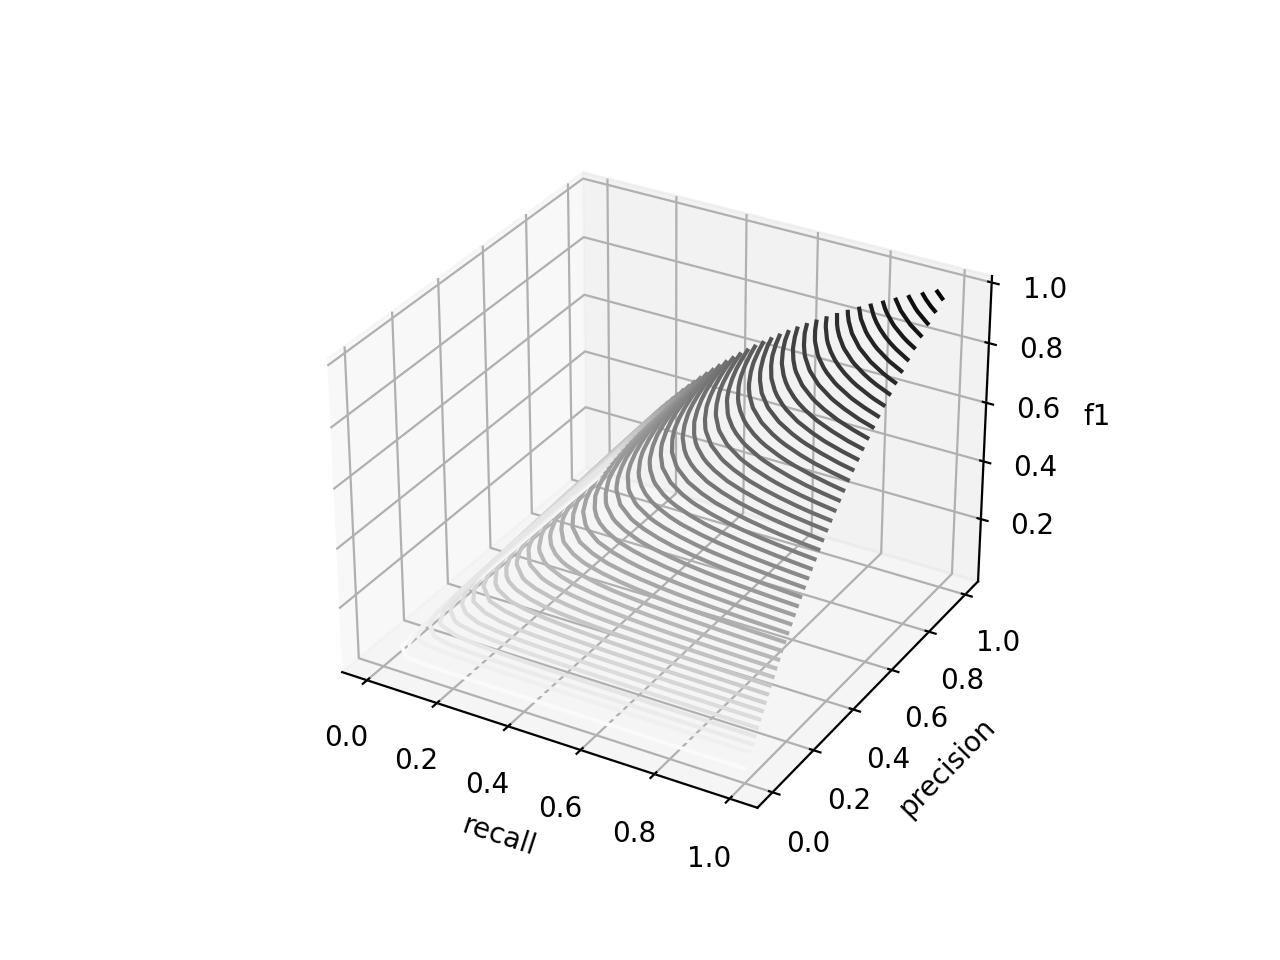

In [201]:
recall = np.linspace(0.001, 1, 20)
precision = recall.copy()

def f1(precision, recall, beta=1):
    return (1 + beta**2) * ((precision * recall) / (beta**2 * precision + recall)) 

rec, prec = np.meshgrid(recall, precision)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(rec, prec, f1(prec, rec), 50, cmap='binary')
ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_zlabel('f1');

# random tree classification

"pure" classifier

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [517]:
tree_df=df.copy()
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(tree_df[X]
                                                                        , tree_df[Y]
                                                                        , stratify=tree_df[Y]
                                                                        , test_size=0.2
                                                                        , random_state=1606)

In [518]:
dt = DecisionTreeClassifier()
dt.fit(tree_X_train, tree_y_train)
tree_y_hat = dt.predict(tree_X_test)

In [519]:
print(classification_report(tree_y_test, tree_y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.09      0.10        11
           5       0.73      0.68      0.70       136
           6       0.67      0.67      0.67       128
           7       0.53      0.65      0.58        40
           8       0.25      0.33      0.29         3

    accuracy                           0.64       320
   macro avg       0.38      0.40      0.39       320
weighted avg       0.65      0.64      0.65       320



**вау**: f1 почти не отличается от лин. регрессии (0.34 vs 0.37) 

- видим, что теперь всё мы сносно предсказываем классы 5, 6, 7 - но всё равно часто ошибаемся на малочисленных классах, что сильно убивает f1

## а как влияют параметры модели?

In [539]:
params={'criterion':['gini', 'entropy', 'log_loss']
           ,'splitter':['best', 'random']
           ,'max_depth':[10,20,50,100]
           ,'class_weight':['balanced', {4:14, 5: 146, 6:123, 7:36, 8:1}]}
for p in params['criterion']:
    dt = DecisionTreeClassifier(max_depth=20,class_weight='balanced',criterion=p)
    dt.fit(tree_X_train, tree_y_train)
    tree_y_hat = dt.predict(tree_X_test)
    print(classification_report(tree_y_test, tree_y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.18      0.20        11
           5       0.75      0.72      0.74       136
           6       0.65      0.65      0.65       128
           7       0.51      0.62      0.56        40
           8       0.20      0.33      0.25         3

    accuracy                           0.65       320
   macro avg       0.39      0.42      0.40       320
weighted avg       0.66      0.65      0.65       320

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.71      0.72       136
           6       0.62      0.64      0.63       128
           7       0.49      0.53      0.51        40
           8       0.25      0.33      0.29         3

    accuracy                           0.63       320
   macro avg       0.35

/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/

**итог** - существенного прироста к f1 засчёт юстировки гиперпараметров деерва мы не получаем;

## проверим, как влияет нормировка признаков на дерево

In [521]:
tree_norm_df = df.copy()
tree_norm_df[X] = (tree_norm_df[X] - tree_norm_df[X].min()) / (tree_norm_df[X].max() - tree_norm_df[X].min())

f_score_norm=[]
for N in range(100):
    tree_norm_X_train, tree_norm_X_test, tree_norm_y_train, tree_norm_y_test = train_test_split(tree_norm_df[X]
                                                                            , tree_norm_df[Y]
                                                                            , stratify = tree_norm_df[Y]
                                                                            , test_size=0.2
                                                                            , random_state=1606)
    dt_norm = DecisionTreeClassifier()

    dt_norm.fit(tree_norm_X_train, tree_norm_y_train)
    tree_norm_y_hat = dt_norm.predict(tree_norm_X_test)
    f_score_norm.append(classification_report(tree_norm_y_test
                                              , tree_norm_y_hat
                                              , output_dict=True
                                              , zero_division=0)['macro avg']['f1-score'])
np.mean(f_score_norm), np.var(f_score_norm)

(0.3926660541246623, 0.00014286758547383936)

In [522]:
f_score=[]
for N in range(100):
    tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(tree_df[X]
                                                                            , tree_df[Y]
                                                                            , stratify=tree_df[Y]
                                                                            , test_size=0.2
                                                                            , random_state=1606)
    dt = DecisionTreeClassifier()

    dt.fit(tree_X_train, tree_y_train)
    tree_y_hat = dt.predict(tree_X_test)
    f_score.append(classification_report(tree_y_test
                                              , tree_y_hat
                                              , output_dict=True
                                              , zero_division=0)['macro avg']['f1-score'])
np.mean(f_score), np.var(f_score)

(0.3932450303297035, 0.00015121198404873383)

в этом случае нормировка тоже особенно не влияет ни на что

# random forest

In [603]:
from sklearn.ensemble import RandomForestClassifier

In [604]:
rfc = RandomForestClassifier(n_estimators=500)

In [605]:
forest_df = df.copy()
forest_X_train, forest_X_test, forest_y_train, forest_y_test = train_test_split(forest_df[X]
                                                                            , forest_df[Y]
                                                                            , stratify=forest_df[Y]
                                                                            , test_size=0.2
                                                                            , random_state=1606)

In [606]:
rfc.fit(forest_X_train, forest_y_train)
forest_y_hat = rfc.predict(forest_X_test)
print(classification_report(forest_y_test, forest_y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.80      0.83      0.82       136
           6       0.68      0.77      0.73       128
           7       0.65      0.50      0.56        40
           8       0.50      0.33      0.40         3

    accuracy                           0.73       320
   macro avg       0.44      0.41      0.42       320
weighted avg       0.70      0.73      0.71       320



/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ninesterov/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**вывод**: получаем то же самое, что и с деревьями, но менее шумное, т.к. сразу усредняем все эффекты засчёт нескольких деревьев (f1 более стабильный)

надо что-то более мощное попробовать

# gradient boosting

In [526]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [527]:
lgbm = lgb.LGBMClassifier(random_state=1606, learning_rate=0.01)

In [528]:
def transform(df):
    gb_df=df.copy()

    normalization_cols=['fixed acidity', 'volatile acidity', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']
    
    #ss = StandardScaler()
    #ss_cols = ['citric acid']
    #gb_df[ss_cols] = ss.fit_transform(gb_df[ss_cols])
    
    for c in transform_cols:
        gb_df[c] = stats.boxcox(gb_df[c])[0] 
    
    
    return gb_df

In [374]:
gb_df = transform(df)

In [533]:
gb_X_train, gb_X_test, gb_y_train, gb_y_test = train_test_split(gb_df[X]
                                                                , gb_df[Y]
                                                                , stratify=gb_df[Y]
                                                                , test_size=0.3
                                                                , random_state=23)  

lgbm.fit(gb_X_train, gb_y_train)
gb_y_hat = lgbm.predict(gb_X_test) 
print(classification_report(gb_y_test, gb_y_hat, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.67      0.79      0.72       204
           6       0.57      0.61      0.59       192
           7       0.60      0.30      0.40        60
           8       1.00      0.20      0.33         5

    accuracy                           0.62       480
   macro avg       0.47      0.32      0.34       480
weighted avg       0.60      0.62      0.60       480



**вывод** из горобки также не видим улучшений в итоговом f1

надо подумать, что делать с фичами

# network

In [593]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [594]:
model = keras.Sequential([
                         layers.BatchNormalization(input_shape=[len(X)])
                         ,layers.Dropout(rate=0.3)
                         ,layers.Dense(units=512,activation='relu')
                         ,layers.BatchNormalization()
                         ,layers.Dropout(rate=0.3)
                         ,layers.Dense(units=1024,activation='relu')
                         ,layers.BatchNormalization()
                         ,layers.Dense(units=512,activation='relu')
                         ,layers.BatchNormalization()
                         ,layers.Dropout(rate=0.3)
                         ,layers.Dense(units=1)])

In [595]:
model.compile(optimizer='adam', loss='mae')

In [596]:
X_nw_train, X_nw_test, y_nw_train, y_nw_test = train_test_split(df[X]
                                                                , df[Y]
                                                                , stratify=df[Y]
                                                                , test_size=0.2
                                                                , random_state=1606)

In [597]:
#early_stopping = callbacks.EarlyStopping(patience=20,min_delta=0.1,restore_best_weights=True)
logs = model.fit(X_nw_train
                 , y_nw_train
                 , validation_data = (X_nw_test, y_nw_test)
                 , batch_size=int(X_nw_train.shape[0]*0.1)
                 #, callbacks=[early_stopping]
                 , epochs=500
                 , verbose=0)

In [598]:
y_hat_nw = np.round(model.predict(X_test))

10/10 [==============================] - 0s 2ms/step


<IPython.core.display.Javascript object>


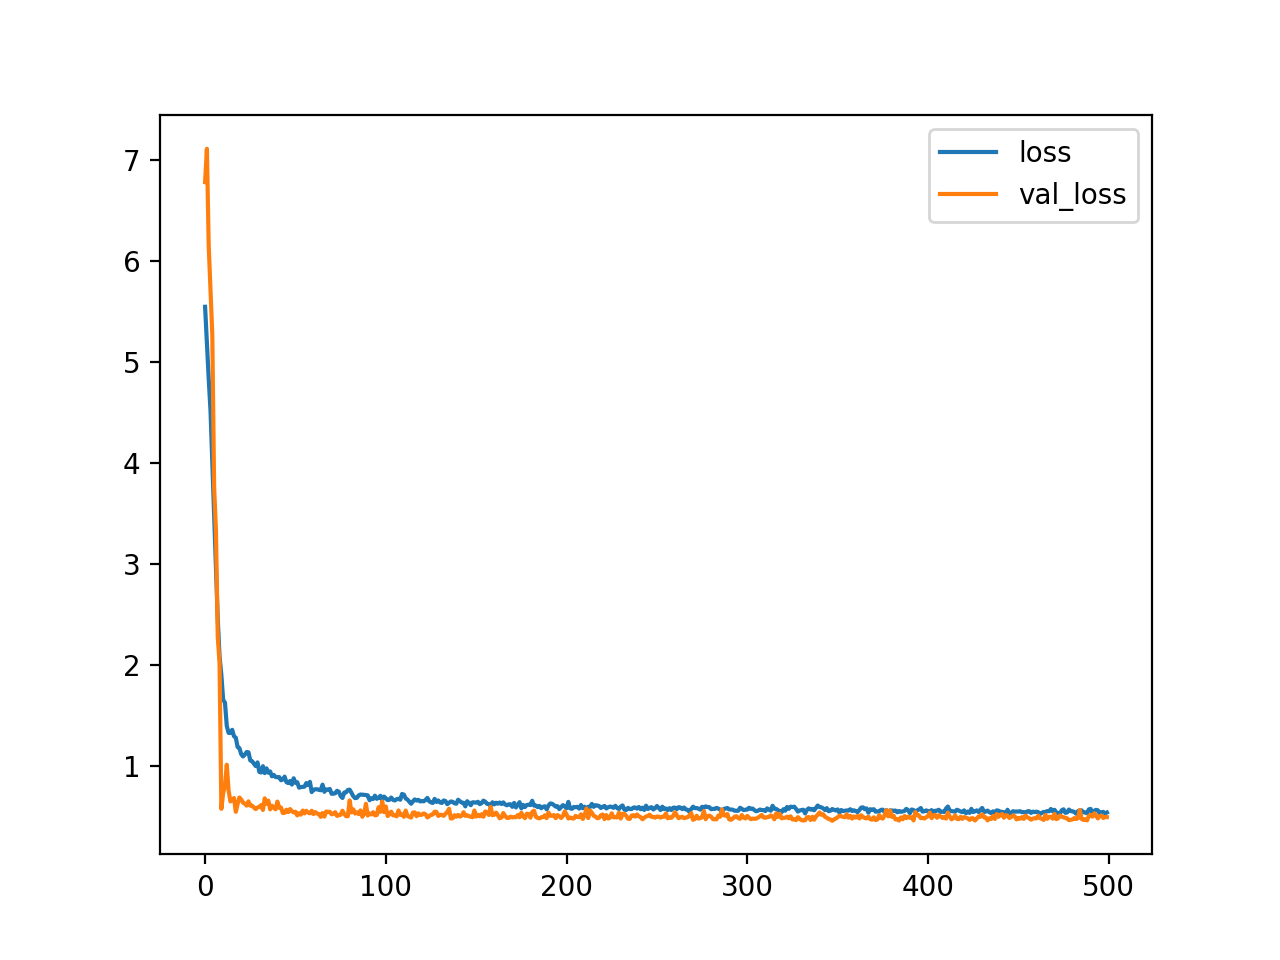

<AxesSubplot:>

In [599]:
logs_df=pd.DataFrame(logs.history)
logs_df.plot()

In [601]:
print(classification_report(y_test, y_hat_nw, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.75      0.70       136
           6       0.54      0.66      0.60       128
           7       0.29      0.05      0.09        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.53      0.59      0.55       320



**вывод**:

- очень сильно влияет нормализация признаков: f1 повысился на 0.06 (±15%)
- сильно влияет кол-во нейронов в слое - на 1024 нейроне в скрытом слое точность очень низкая

# xgboost